In [7]:
%matplotlib inline

from nba_py import player
from nba_py import shotchart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.random.seed(4)

In [8]:
def get_PID(first_name, last_name):
    """Obtains the player ID number of the desired player.
    
    Parameters
    -----------
    
    first_name: str
        First name of player
    last_name: str
        Last name of player
    
    Returns
    -------
    
    ID : float
        The player's ID number. 
    """
    
    playa = player.get_player(first_name=first_name,last_name=last_name)
    
    return playa.values[0]

In [9]:
dinwiddie = get_PID('Spencer','Dinwiddie')

In [10]:
def get_shotchart(PID):
    """Returns a dataframe of the shotchart.
    """
    chart = shotchart.ShotChart(PID)
    chartdf = chart.shot_chart()
    
  #  importantstuff = chartdf[['LOC_X','LOC_Y','SHOT_DISTANCE','ACTION_TYPE','EVENT_TYPE']].copy()   #['LOC_X','LOC_Y','EVENT_TYPE']
    importantstuff = chartdf[['LOC_X','LOC_Y','ACTION_TYPE','EVENT_TYPE']].copy()
    importantstuff = pd.get_dummies(importantstuff)
    return importantstuff

In [11]:
spencertable = get_shotchart(dinwiddie)

In [12]:
spencertable

,LOC_X,LOC_Y,ACTION_TYPE_Cutting Dunk Shot,ACTION_TYPE_Cutting Layup Shot,ACTION_TYPE_Driving Bank shot,ACTION_TYPE_Driving Dunk Shot,ACTION_TYPE_Driving Finger Roll Layup Shot,ACTION_TYPE_Driving Floating Jump Shot,ACTION_TYPE_Driving Hook Shot,ACTION_TYPE_Driving Layup Shot,ACTION_TYPE_Driving Reverse Layup Shot,ACTION_TYPE_Dunk Shot,ACTION_TYPE_Fadeaway Jump Shot,ACTION_TYPE_Floating Jump shot,ACTION_TYPE_Jump Bank Shot,ACTION_TYPE_Jump Shot,ACTION_TYPE_Layup Shot,ACTION_TYPE_Pullup Bank shot,ACTION_TYPE_Pullup Jump shot,ACTION_TYPE_Reverse Layup Shot,ACTION_TYPE_Running Dunk Shot,ACTION_TYPE_Running Jump Shot,ACTION_TYPE_Running Layup Shot,ACTION_TYPE_Running Pull-Up Jump Shot,ACTION_TYPE_Running Reverse Layup Shot,ACTION_TYPE_Step Back Jump shot,ACTION_TYPE_Tip Layup Shot,EVENT_TYPE_Made Shot,EVENT_TYPE_Missed Shot
0,168,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,58,80,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,25,80,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,91,254,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,20,-5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,-74,90,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7,-37,77,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,-189,188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9,-209,175,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
makes = spencertable.loc[spencertable['EVENT_TYPE_Missed Shot'] == 0]
misses = spencertable.loc[spencertable['EVENT_TYPE_Missed Shot'] == 1]
makepos = makes[['LOC_X','LOC_Y']].values
xmade = makes['LOC_X'].values
ymade = makes['LOC_Y'].values
xmissed = misses['LOC_X'].values
ymissed = misses['LOC_Y'].values
missespos = misses[['LOC_X','LOC_Y']].values

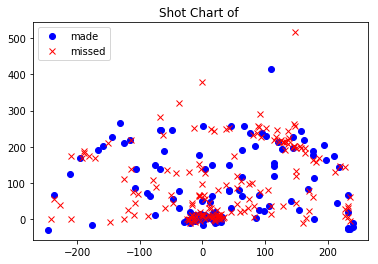

In [14]:

plt.plot(xmade,ymade,'bo',label = 'made')
plt.plot(xmissed,ymissed,'rx',label = 'missed')
plt.title("Shot Chart of " + str())
plt.legend()

In [15]:
from sklearn import preprocessing, cross_validation, neighbors

/home/aaron/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
y = spencertable[['EVENT_TYPE_Made Shot','EVENT_TYPE_Missed Shot']].values

del spencertable['EVENT_TYPE_Made Shot'],spencertable['EVENT_TYPE_Missed Shot']

In [17]:
from sklearn.cluster import SpectralClustering

In [18]:
X = spencertable.values

In [19]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [22]:

clf = SpectralClustering(n_clusters=2)
clf.fit(X_train,y_train)

/home/aaron/miniconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [23]:
clf.fit_predict(X_train,y_train)

/home/aaron/miniconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

AttributeError: 'SpectralClustering' object has no attribute 'score'